In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Do

[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data

[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package perluniprops to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading packa

True

## Reading File and creating DataFrame

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()


In [3]:
import pandas as pd
wiki_files = pd.read_csv('wiki_sample.csv')
wiki_dataframe = pd.DataFrame(wiki_files)
wiki_dataframe

,content,title,id
0,Morocco–Saudi Arabia relations\r\n\r\nMoroccan...,Morocco–Saudi Arabia relations,1
1,Anthony United States Post Office\r\n\r\nThe A...,Anthony United States Post Office,2
2,Dumraon (Vidhan Sabha constituency)\r\n\r\nDum...,Dumraon Vidhan Sabha constituency,3
3,Chaker Khazaal\r\n\r\nChaker Khazaal (born 28 ...,Chaker Khazaal,4
4,Vicente Pascual Pastor\r\n\r\nVicente Pascual ...,Vicente Pascual Pastor,5
...,...,...,...
1286259,Toppr\r\n\r\nToppr is a product of Haygot Educ...,Toppr,1286260
1286260,Outline of education\r\n\r\nThe following outl...,Outline of education,1286261
1286261,Raell Padamsee\r\n\r\nRaell Padamsee is an Ind...,Raell Padamsee,1286262
1286262,Megan Callaway\r\n\r\nMegan Callaway is a foun...,Megan Callaway,1286263


## Preprocessing and Creating Vocab

In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [ ]:
def apply_function(row, lenTitle):
    filtered_content = []
    for token in nltk.word_tokenize(row['content'][lenTitle:]):
        token = lemmatizer.lemmatize(token).lower()
        if token not in stop_words and token.isalnum():
           filtered_content.append(token) 
        
    return filtered_content

In [15]:
wiki_dataframe['tokenized_content'] = wiki_dataframe.progress_apply(lambda row: apply_function(row, len(row['title']), row['id']), axis=1)

  3%|▎         | 32693/1286264 [26:06<16:41:13, 20.87it/s]


KeyboardInterrupt: 

In [6]:
wiki_dataframe.to_pickle('./wiki_dataframe')


In [12]:
# import pickle5 as pickle
# with open("./wiki_dataframe", "rb") as pickle_file:
#   wiki_dataframe_pickle = pickle.load(pickle_file)
wiki_dataframe_pickle = pd.read_pickle('./wiki_dataframe')

In [13]:
wiki_dataframe_pickle

,content,title,id,tokenized_content
0,Morocco–Saudi Arabia relations\r\n\r\nMoroccan...,Morocco–Saudi Arabia relations,1,"[arabian, relation, refers, current, historica..."
1,Anthony United States Post Office\r\n\r\nThe A...,Anthony United States Post Office,2,"[anthony, united, states, post, office, listed..."
2,Dumraon (Vidhan Sabha constituency)\r\n\r\nDum...,Dumraon Vidhan Sabha constituency,3,"[dumraon, vidhan, sabha, constituency, one, 24..."
3,Chaker Khazaal\r\n\r\nChaker Khazaal (born 28 ...,Chaker Khazaal,4,"[chaker, khazaal, born, 28, september, 1987, b..."
4,Vicente Pascual Pastor\r\n\r\nVicente Pascual ...,Vicente Pascual Pastor,5,"[vicente, pascual, pastor, alcoy, june, 3, 186..."
...,...,...,...,...
1286259,Toppr\r\n\r\nToppr is a product of Haygot Educ...,Toppr,1286260,"[toppr, product, haygot, education, private, l..."
1286260,Outline of education\r\n\r\nThe following outl...,Outline of education,1286261,"[following, outline, provided, overview, topic..."
1286261,Raell Padamsee\r\n\r\nRaell Padamsee is an Ind...,Raell Padamsee,1286262,"[raell, padamsee, indian, theatre, personality..."
1286262,Megan Callaway\r\n\r\nMegan Callaway is a foun...,Megan Callaway,1286263,"[megan, callaway, founder, archer, school, gir..."


In [80]:
vocab = set()
heaps_law_dataset = list()

i = 0
total_words = 0
count = 0
count2 = list() #number of times len(vocab) - past_unique_words is consistently less than 20
past_unique_words = 0
for document in tqdm(wiki_dataframe_pickle['tokenized_content']):
    if len(vocab) - past_unique_words < 20:
            count += 1
    else: 
        count = 0
    if count > 20:
        count2.append(i)
    #if i % 1000 == 0:
    heaps_law_dataset.append((total_words, len(vocab)))
    past_unique_words = len(vocab)
    i += 1
    for word in document:
        total_words += 1
        vocab.add(word)
#             if count >= 900:
#                 break
#             else:
#                 count = 0
#     else:
#         continue
#     break

100%|█████████████████████████████████████████████████████████████████████| 1286264/1286264 [00:28<00:00, 44737.56it/s]


In [50]:
len(vocab)

1731793

In [44]:
numberSet = set()
array = [1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 9, 9, 10]
for number in array:
   numberSet.add(number)
print(numberSet)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [43]:
vocab

{'solveig',
 '1734',
 'debora',
 'colegio',
 'palupõhja',
 'trutv',
 'lazio',
 'airjaldi',
 'croaker',
 'fontainebleau',
 'protesting',
 'hulled',
 'fajr',
 'rwe',
 'bayat',
 'mcmurray',
 'njáls',
 'baronii',
 'sudani',
 'sabur',
 'behead',
 'maurya',
 'hail',
 'b36',
 'telefilm',
 'llanrhos',
 'jaroslav',
 'carwood',
 'fatecha',
 'stalybridge',
 'archbishop',
 'decurrens',
 'isp',
 'saba',
 'singkep',
 'annis',
 'mendocino',
 'glöckler',
 'petersen',
 'akron',
 'íþróttafélag',
 'rahmatganj',
 'mather',
 'amin',
 'phule',
 'iff',
 'pantheon',
 'flintlock',
 'olav',
 'ciclable',
 'transmitter',
 'insanity',
 'useful',
 'mohite',
 'inflexion',
 'defensio',
 'dominici',
 'drapery',
 'spectator',
 'gomersal',
 'gaurav',
 'receipt',
 'flr',
 'microscopy',
 'midwestern',
 'rancore',
 'gracilistylus',
 'taksim',
 'apga',
 'bibliotheek',
 'suggestion',
 'wages',
 'cga',
 'proscribed',
 'simbel',
 'grace',
 'cousin',
 'remaster',
 'pingfen',
 'barnes',
 'choman',
 'maître',
 'ridiculous',
 'mag

In [61]:
len(heaps_law_dataset)

1287

In [54]:
i

1000

In [47]:
len(wiki_dataframe_pickle['tokenized_content'][0])

145

## Heaps Law

In [69]:
len(heaps_law_dataset)

1286264

In [142]:
heaps_law_dataset[len(heaps_law_dataset)-1]

(144533236, 1731793)

In [151]:
import matplotlib.pyplot as plt
import math

def heaps_law(list_to_graph):
        x = list()
        y = list()
        
        for item in list_to_graph:
            x.append(item[0])
            y.append(item[1])
            
        expected_x = list()
        expected_y = list()
        
        k = 20
        for n in range(len(list_to_graph)):
            expected_x.append(n)
            expected_y.append(math.pow(n, 0.5) * k)

        plt.loglog(x, y)
        plt.xlim(1, x[-1])
        plt.ylim(1, y[-1])
        plt.loglog(expected_x,expected_y)
        plt.xlim(1, x[-1])
        plt.ylim(1, y[-1])
        plt.savefig("heaps_law.png")

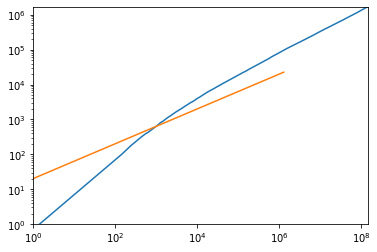

In [152]:
heaps_law(heaps_law_dataset)